In [42]:
import os
import matplotlib.font_manager as font_manager
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.patches import Patch

In [43]:
df = pd.read_csv("all_failures_database.csv")
model_grouped = df.groupby(["board", "family", "config", "hardening", ]).sum()
# model_grouped["SDC"] = (model_grouped["SDC"] - model_grouped["critical_SDC"]).abs()
model_grouped["#faults"] = 1750
model_grouped["PVF Tolerable SDC"] = model_grouped["SDC"] / model_grouped["#faults"]
model_grouped["PVF Critical SDC"] = model_grouped["critical_SDC"] / model_grouped["#faults"]
model_grouped["PVF DUE"] = model_grouped["DUE"] / model_grouped["#faults"]

In [44]:
model_grouped = model_grouped.reindex(
    ["Unhardened", "Hardened"], level="hardening"
).reindex(
    ["Original ViT", "EVA", "Swin", "MaxViT"], level="family"
).reindex(
    ["BS32-224", "B16-224", "B16-384", "L14-224", "H14-224", "B14-448", "L14-448", "B256", "B384", "L256", "L384",
     "L512"], level="config"
)

In [45]:
model_grouped

SDC  critical_SDC  DUE  #faults  \
board  family       config   hardening                                     
Ampere Original ViT BS32-224 Unhardened  547            99   36     1750   
                             Hardened    626            52   38     1750   
                    B16-224  Unhardened  545           112   43     1750   
                             Hardened    632            56   35     1750   
                    B16-384  Unhardened  486           133   45     1750   
                             Hardened    552            61   35     1750   
                    L14-224  Unhardened  428           101   25     1750   
                             Hardened    550            31   31     1750   
                    H14-224  Unhardened  436           106   37     1750   
                             Hardened    526            29   32     1750   
       EVA          B14-448  Unhardened  342           226   35     1750   
                             Hardened    546            21   40     1750   
                    L14-448  Unhardened  274           238   59     1750   
                             Hardened    472            37   44     1750   
       Swin         B256     Unhardened  516            48   53     1750   
                             Hardened    544            48   50     1750   
                    B384     Unhardened  415            28   65     1750   
                             Hardened    403            28   62     1750   
                    L256     Unhardened  514            48   49     1750   
                             Hardened    503            23   51     1750   
       MaxViT       L384     Unhardened  255           277   42     1750   
                             Hardened    379           149   50     1750   
                    L512     Unhardened  273           263   50     1750   
                             Hardened    407           143   35     1750   
Pascal Original ViT BS32-224 Unhardened  625           136   30     1750   
                             Hardened    738            62   40     1750   
                    B16-224  Unhardened  616           130   34     1750   
                             Hardened    645            57   45     1750   
                    B16-384  Unhardened  534           159   26     1750   
                             Hardened    627            62   35     1750   
                    L14-224  Unhardened  511           107   22     1750   
                             Hardened    584            39   26     1750   
                    H14-224  Unhardened  482           110   22     1750   
                             Hardened    581            30   13     1750   
       EVA          B14-448  Unhardened  321           275   48     1750   
                             Hardened    546            33   50     1750   
                    L14-448  Unhardened  298           266   35     1750   
                             Hardened    523            25   31     1750   
       Swin         B256     Unhardened  599            44   84     1750   
                             Hardened    585            41   69     1750   
                    B384     Unhardened  428            46   73     1750   
                             Hardened    474            30   59     1750   
                    L256     Unhardened  567            38   49     1750   
                             Hardened    609            31   67     1750   
       MaxViT       L384     Unhardened  128           278   65     1750   
                             Hardened    309           143   44     1750   
                    L512     Unhardened  136           306   44     1750   
                             Hardened    304           149   60     1750   

                                         PVF Tolerable SDC  PVF Critical SDC  \
board  family       config   hardening                                         
Ampere Original ViT BS32-224 Unhardened           0.312571          0.056571   


In [46]:
pvf_reduced = model_grouped[["PVF Tolerable SDC", "PVF Critical SDC", "PVF DUE"]]

In [47]:
pvf_reduced

PVF Tolerable SDC  PVF Critical SDC  \
board  family       config   hardening                                         
Ampere Original ViT BS32-224 Unhardened           0.312571          0.056571   
                             Hardened             0.357714          0.029714   
                    B16-224  Unhardened           0.311429          0.064000   
                             Hardened             0.361143          0.032000   
                    B16-384  Unhardened           0.277714          0.076000   
                             Hardened             0.315429          0.034857   
                    L14-224  Unhardened           0.244571          0.057714   
                             Hardened             0.314286          0.017714   
                    H14-224  Unhardened           0.249143          0.060571   
                             Hardened             0.300571          0.016571   
       EVA          B14-448  Unhardened           0.195429          0.129143   
                             Hardened             0.312000          0.012000   
                    L14-448  Unhardened           0.156571          0.136000   
                             Hardened             0.269714          0.021143   
       Swin         B256     Unhardened           0.294857          0.027429   
                             Hardened             0.310857          0.027429   
                    B384     Unhardened           0.237143          0.016000   
                             Hardened             0.230286          0.016000   
                    L256     Unhardened           0.293714          0.027429   
                             Hardened             0.287429          0.013143   
       MaxViT       L384     Unhardened           0.145714          0.158286   
                             Hardened             0.216571          0.085143   
                    L512     Unhardened           0.156000          0.150286   
                             Hardened             0.232571          0.081714   
Pascal Original ViT BS32-224 Unhardened           0.357143          0.077714   
                             Hardened             0.421714          0.035429   
                    B16-224  Unhardened           0.352000          0.074286   
                             Hardened             0.368571          0.032571   
                    B16-384  Unhardened           0.305143          0.090857   
                             Hardened             0.358286          0.035429   
                    L14-224  Unhardened           0.292000          0.061143   
                             Hardened             0.333714          0.022286   
                    H14-224  Unhardened           0.275429          0.062857   
                             Hardened             0.332000          0.017143   
       EVA          B14-448  Unhardened           0.183429          0.157143   
                             Hardened             0.312000          0.018857   
                    L14-448  Unhardened           0.170286          0.152000   
                             Hardened             0.298857          0.014286   
       Swin         B256     Unhardened           0.342286          0.025143   
                             Hardened             0.334286          0.023429   
                    B384     Unhardened           0.244571          0.026286   
                             Hardened             0.270857          0.017143   
                    L256     Unhardened           0.324000          0.021714   
                             Hardened             0.348000          0.017714   
       MaxViT       L384     Unhardened           0.073143          0.158857   
                             Hardened             0.176571          0.081714   
                    L512     Unhardened           0.077714          0.174857   
                             Hardened             0.173714          0.085143   

                                        

In [48]:
with pd.ExcelWriter("~/temp/pvf_parsed_tmp.xlsx") as writer:
    model_grouped.to_excel(writer, sheet_name="raw_data")
    pvf_reduced.to_excel(writer, sheet_name="PVF")

In [49]:
sns.set_style("whitegrid")
sns.set_color_codes("pastel")

In [50]:
def plot_figure(board):
    # set the figure size
    fig, ax = plt.subplots(figsize=(12, 4.2))
    pvf = pvf_reduced.loc[pd.IndexSlice[board, :, :, :]].droplevel("board").reset_index()
    width = 0.25
    bar_width = 0.20
    configs = pvf["config"].unique()
    families = pvf["family"].unique()
    ind = np.arange(configs.size) - width / 2
    print(f", ".join(map(str, zip(configs, ind))))
    print(families)
    font_size = 19
    y_tick_step = 10
    max_y_value = round(pvf_reduced.sum(axis=1).max() * 10) * 10
    y_ticks = np.arange(0, max_y_value + y_tick_step, y_tick_step)
    print(y_ticks)
    line_width = 1
    temp_file = f"/tmp/{board}_pvf.pdf"
    final_file = f"/home/fernando/git_research/date_2024_vits/fig/pvf_{board.lower()}.pdf"
    # SDC on the ppt 132 151 176
    # critical 251 209 245 
    # DUE 255 217 102
    tol_sdc_color = (132 / 255, 151 / 255, 176 / 255)  # "#44a5c2"
    cri_sdc_color = (251 / 255, 209 / 255, 245 / 255)  # "#ffae49"
    due_color = (255 / 255, 217 / 255, 102 / 255)  # "#aaae49"
    y_subsection_pos = -0.13

    hatch_pattern = '///'
    for i, style in enumerate([("Unhardened", ""),
                               ("Hardened", hatch_pattern)]):
        hardening, hatch = style
        pvf_df = pvf[pvf["hardening"] == hardening]
        tolerable = pvf_df["PVF Tolerable SDC"] * 100.0
        critical = pvf_df["PVF Critical SDC"] * 100.0
        due = pvf_df["PVF DUE"] * 100.0
        plt.bar(ind + width * i, tolerable, width=bar_width,
                color=tol_sdc_color, edgecolor="black", linewidth=line_width, hatch=hatch)
        plt.bar(ind + width * i, critical, width=bar_width, bottom=tolerable,
                color=cri_sdc_color, edgecolor="black", linewidth=line_width, hatch=hatch)
        plt.bar(ind + width * i, due, width=bar_width, bottom=tolerable + critical,
                color=due_color, edgecolor="black", linewidth=line_width, hatch=hatch)

    for axis in ['bottom', 'left']:
        ax.spines[axis].set_linewidth(line_width)
        ax.spines[axis].set_color("black")
        ax.spines['bottom'].set_position(('data', 0))

    # https://stackoverflow.com/questions/71048752/adding-multi-level-x-axis
    # Putting the subcategory
    # vertical lines to separate the categories
    pos = np.array([4.875, 6.875, 9.875]) - width * 1.5
    text_pos = np.array([1.875 + width / 2, 5.875 - width * 1.5, 7.875 + width / 2, 10.875 - width * 1.5])
    # vertical lines to separate the years
    ax.vlines(x=pos, ymin=1, ymax=y_subsection_pos, color='black', lw=line_width, clip_on=False, linestyles="--",
              transform=ax.get_xaxis_transform())

    # put labels at the center of their range
    for family, pos0 in zip(families, text_pos):
        ax.text(pos0, y_subsection_pos, family, ha='center', clip_on=False, transform=ax.get_xaxis_transform(),
                fontsize=font_size, weight='bold')

    # Adding legend
    custom_lines = [
        Patch(facecolor='lightgray', edgecolor='black', label='Unhardened'),
        Patch(facecolor='lightgray', edgecolor='black', label='Hardened', hatch=hatch_pattern),
        Patch(facecolor=tol_sdc_color, edgecolor='black', label='Tolerable SDC'),
        Patch(facecolor=cri_sdc_color, edgecolor='black', label='Critical SDC'),
        Patch(facecolor=due_color, edgecolor='black', label='DUE')
    ]
    font = font_manager.FontProperties(weight='bold',
                                       style='normal', size=font_size)
    plt.legend(handles=custom_lines, bbox_to_anchor=(0.98, 1.2), edgecolor=None, frameon=False,
               ncol=len(custom_lines), fontsize=font_size, prop=font, columnspacing=0.3,
               handletextpad=0.3)
    ax.yaxis.set_ticks(y_ticks)
    ax.set_xticks(ticks=ind + width / 2, labels=configs, weight="bold", fontsize=font_size - 5)
    ax.set_ylabel("Program Vulnerability Factor", fontsize=font_size, weight='bold')
    plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{int(y)}%'))
    ax.tick_params(left=True, bottom=False, direction="in")
    sns.despine(ax=ax, left=False, trim=False)
    plt.margins(x=0.04, tight=True)
    ax.xaxis.grid(False)  # remove the vertical gridlines
    plt.yticks(fontsize=font_size, weight='bold')

    plt.tight_layout()
    plt.savefig(temp_file)
    os.system(f"pdfcrop {temp_file} {final_file}")

('BS32-224', -0.125), ('B16-224', 0.875), ('B16-384', 1.875), ('L14-224', 2.875), ('H14-224', 3.875), ('B14-448', 4.875), ('L14-448', 5.875), ('B256', 6.875), ('B384', 7.875), ('L256', 8.875), ('L384', 9.875), ('L512', 10.875)
['Original ViT' 'EVA' 'Swin' 'MaxViT']
[ 0 10 20 30 40 50]
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `/home/fernando/git_research/date_2024_vits/fig/pvf_ampere.pdf'.


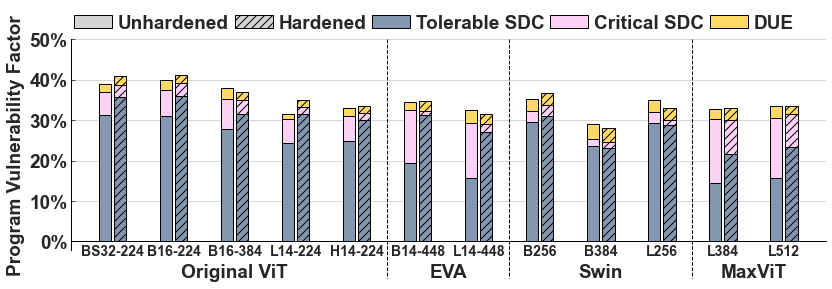

In [51]:
plot_figure("Ampere")

('BS32-224', -0.125), ('B16-224', 0.875), ('B16-384', 1.875), ('L14-224', 2.875), ('H14-224', 3.875), ('B14-448', 4.875), ('L14-448', 5.875), ('B256', 6.875), ('B384', 7.875), ('L256', 8.875), ('L384', 9.875), ('L512', 10.875)
['Original ViT' 'EVA' 'Swin' 'MaxViT']
[ 0 10 20 30 40 50]
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `/home/fernando/git_research/date_2024_vits/fig/pvf_pascal.pdf'.


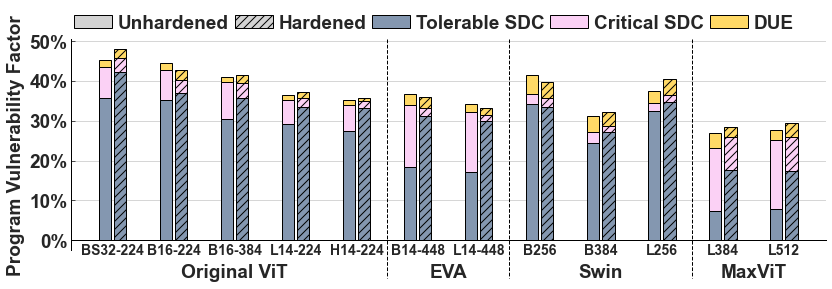

In [52]:
plot_figure("Pascal")